<a href="https://colab.research.google.com/github/Bayrkdartech/Binder/blob/main/Practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption
License(s): CC0-1.0
hourly-energy-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  hourly-energy-consumption.zip
replace data/AEP_hourly.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/AEP_hourly.csv     
  inflating: data/COMED_hourly.csv   
  inflating: data/DAYTON_hourly.csv  
  inflating: data/DEOK_hourly.csv    
  inflating: data/DOM_hourly.csv     
  inflating: data/DUQ_hourly.csv     
  inflating: data/EKPC_hourly.csv    
  inflating: data/FE_hourly.csv      
  inflating: data/NI_hourly.csv      
  inflating: data/PJME_hourly.csv    
  inflating: data/PJMW_hourly.csv    
  inflating: data/PJM_Load_hourly.csv  
  inflating: data/est_hourly.paruqet  
  inflating: data/pjm_hourly_est.csv  
PJME_MW    

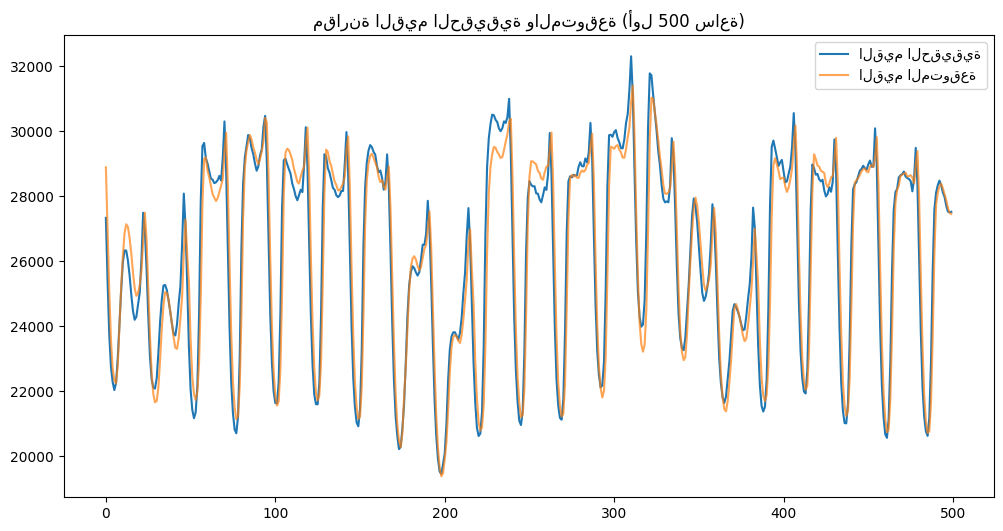

,PJME_MW,get_gap,gap_type,year,month,day,hour,dayofweek,is_weekend,lag_1,lag_24,lag_168,rolling_main_24,rolling_std_24,season
2002-01-08 01:00:00,29445.0,-2 days +01:00:00,small gap,2002,1,8,1,1,0,31187.0,26862.0,30393.0,33560.208333,4425.965952,winter
2002-01-08 02:00:00,28670.0,0 days 01:00:00,normal,2002,1,8,2,1,0,29445.0,25976.0,29265.0,33672.458333,4256.159403,winter
2002-01-08 03:00:00,28375.0,0 days 01:00:00,normal,2002,1,8,3,1,0,28670.0,25641.0,28357.0,33786.375000,4064.104959,winter
2002-01-08 04:00:00,28542.0,0 days 01:00:00,normal,2002,1,8,4,1,0,28375.0,25666.0,27899.0,33906.208333,3851.076461,winter
2002-01-08 05:00:00,29261.0,0 days 01:00:00,normal,2002,1,8,5,1,0,28542.0,26328.0,28057.0,34028.416667,3640.941409,winter


In [8]:


# استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from google.colab import drive
import os
import shutil

# 1. توصيل Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. إنشاء مجلد للكاجل داخل Colab
!mkdir -p ~/.kaggle

# 3. نسخ ملف kaggle.json من Google Drive إلى مجلد الكاجل
# غيّر هذا المسار حسب مكان ملف kaggle.json في Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

# 4. ضبط الأذونات
!chmod 600 ~/.kaggle/kaggle.json

# 5. تحميل بيانات من Kaggle
# مثال: تحميل Dataset الطاقة "Hourly Energy Consumption"
!kaggle datasets download -d robikscube/hourly-energy-consumption

# 6. فك الضغط عن البيانات
!unzip hourly-energy-consumption.zip -d data/

# 7. قراءة الملف باستخدام Pandas
import pandas as pd

# مثال: قراءة ملف PJME_hourly.csv
df = pd.read_csv('data/PJME_hourly.csv')

# عرض أول 5 صفوف


##first step ##### we turned the string to datetime

df['Datetime']= pd.to_datetime(df['Datetime'])
df.sort_values('Datetime')
df.set_index('Datetime', inplace=True)
df.resample('h').mean()






print(df.isna().sum())
df.dropna().sum()

# عرض القيم المكررة نفسها
df=df[~df.index.duplicated(keep='first')]
duplicates= df[df.index.duplicated(keep=False)]
print(duplicates)

print(df.isna().sum().sum(),'قيم المفقودة:')


###### --  outliers -- ####


q1= df['PJME_MW'].quantile(0.25)
q3= df['PJME_MW'].quantile(0.75)
iqr= q3 - q1
outliers= df[(df['PJME_MW'] < q1 - 1.5 * iqr) | (df['PJME_MW']> q3 + 1.5 * iqr)]
print(len(outliers),"القيم الشادة")

#عرض اول 10 قيم شادة قبل تعديل
print("قيم الشادة :\n", df.loc[outliers.index,'PJME_MW'].head(10))

#تعديل قيم الشادة
df_modified= df.copy()
median_values= df['PJME_MW'].median()
df_modified.loc[outliers.index,'PJME_MW']=median_values
print('تم تعديل القيم الشادة بواسطة الوسيط')

#عرض قسم الشادة بعد تعديل
print("قيم الشادة :\n", df_modified.loc[outliers.index, 'PJME_MW'].head(10))
# اكتشاف فجوات زمنية
Azez_diff=pd.Timedelta(hours=1)
time_diff= df.index.to_series().diff()
# عرض الفجزات كبيرة
gabs=time_diff[time_diff> Azez_diff]
print(gabs)
# تصنيف الفجوة باستخدام دالة الشركة if
df['get_gap']= time_diff
df['gap_type']= df['get_gap'].apply(lambda x: 'normal' if x== Azez_diff
else ('small gap' if x< pd.Timedelta(days= 1)
else 'larg_gap')

)

#  عرض فجوات كبيرة
larg_gap= df[df['gap_type']== 'larg_gap']
print("الفجوات الزمنية الكبيرة :\n", larg_gap[['PJME_MW', 'get_gap']])
df.head()

# fill the large time gaps
df.index=pd.to_datetime(df.index)

full_index=pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')
df= df.reindex(full_index)
df['PJME_MW']= df['PJME_MW'].ffill().bfill()
#print the result after fill in by previous result

# adding more features ## year
df['year']= df.index.year
#adding month
df['month']= df.index.month
#adding days
df['day']= df.index.day
#adding hours
df['hour']= df.index.hour
#adding dayoff
df['dayofweek']= df.index.dayofweek
# adding week end
df['is_weekend']= (df.index.dayofweek >= 5).astype(int)
# lag features for day and hour
df['lag_1']= df['PJME_MW'].shift(1)
df['lag_24']= df['PJME_MW'].shift(24)
df['lag_168']= df['PJME_MW'].shift(24*7)

# rolling statistic

df['rolling_main_24']= df['PJME_MW'].rolling(window=24).mean()
df['rolling_std_24']= df['PJME_MW'].rolling(window=24).std()
df= df.dropna()

#make seasons
def get_season(month):
    if month in [12,1,2]:
       return "winter"
    elif month in [3,4,5]:
       return "spring"
    elif month in [6,7,8]:
       return "summer"
    else:
       return "Autmin"
df['season']= df['month'].apply(get_season)

# training.  Testing
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['PJME_MW']])
test_scaled = scaler.transform(test[['PJME_MW']])


# linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# اختيار Features للتدريب
features = ['year','month','day','hour','dayofweek','is_weekend',
            'lag_1','lag_24','lag_168','rolling_main_24','rolling_std_24']

X_train = train[features]
y_train = train['PJME_MW']
X_test = test[features]
y_test = test['PJME_MW']

# بناء النموذج
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)

# تقييم النموذج
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 نتائج التقييم:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


plt.figure(figsize=(12,6))
plt.plot(y_test.values[:500], label="القيم الحقيقية")
plt.plot(y_pred[:500], label="القيم المتوقعة", alpha=0.7)
plt.legend()
plt.title("مقارنة القيم الحقيقية والمتوقعة (أول 500 ساعة)")
plt.show()
df.head()